In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv('test_createEvent.csv',delimiter = ',')
dataset = dataset.loc[dataset['proj_span'] >= 2.0]
# dataset1 = pd.read_csv('test_createEvent_12_18.csv',delimiter = ',') # this one does not take care the CRAN before GH date

In [3]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(9709, 23)

In [4]:
dataset.describe()

,activity_intensity,class,final_teamsize,first_quater_teamsize,normalized_proj_span,num_CommitComment,num_Create,num_Delete,num_Download,num_Fork,...,num_Issues,num_Member,num_Public,num_PullRequest,num_PullRequestReviewComment,num_Push,num_Release,num_TeamAdd,num_Watch,proj_span
count,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,...,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
mean,0.779384,0.135853,7.098156,6.892471,0.095892,0.113606,1.757133,0.163457,0.013905,4.740550,...,1.166135,0.090226,0.006798,1.932537,0.476465,13.948295,0.054795,0.004738,1.066021,175.003502
std,1.517324,0.342650,402.884139,402.887401,0.166633,1.784129,2.785109,1.211451,0.589980,390.656206,...,16.881751,0.504712,0.157739,52.139998,26.633173,39.319484,0.596036,0.078473,10.436935,304.105835
min,0.001577,0.000000,1.000000,0.000000,0.001096,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.060606,0.000000,1.000000,1.000000,0.004384,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,8.000000
50%,0.225806,0.000000,1.000000,1.000000,0.024658,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,45.000000
75%,0.833333,0.000000,2.000000,2.000000,0.109041,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,199.000000
max,27.013793,1.000000,39666.000000,39666.000000,1.237260,122.000000,98.000000,48.000000,45.000000,38489.000000,...,1450.000000,30.000000,13.000000,4353.000000,2556.000000,1894.000000,29.000000,2.000000,593.000000,2258.000000


In [5]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, random_state=20190101)

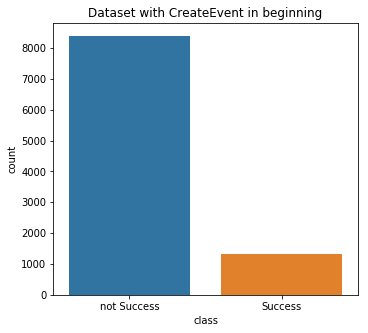

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CreateEvent in beginning')
# ax2 = plt.subplot(1,2,2)
# sns.countplot(x='class', data=dataset1)
# ax2.set_xticklabels(['not Success', 'Success'])
# plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [7]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.86374
Precision on train: 0.40310
Recall on train: 0.05771

Classification accuracy of the LogisticRegression classifier on test set: 0.85410
Precision on test: 0.44444
Recall on test: 0.06699


array([[2460,   35],
       [ 390,   28]])

In [8]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-9.16030633e-01 -3.96913434e-01  1.59664925e-01  3.90249257e-07
   1.37347282e-02  2.33838684e-01  1.63248321e-01 -5.33269388e-02
  -1.24289769e-01  2.45442398e-02  6.94274331e-02 -5.25172390e-02
  -6.26657191e-02 -1.84170971e-02  4.14015883e-02 -3.64768772e-02
  -1.36222072e-02  1.37639613e-01 -2.94807354e-03  2.79068145e-01
   7.12204894e-04]]
[-1.3275112]


In [9]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

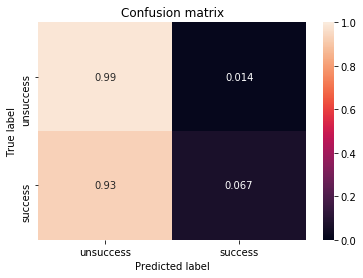

In [10]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [11]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_test = ss.transform(X_test)

In [12]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.86595
Precision on train: 0.45370
Recall on train: 0.05438

Classification accuracy of the LogisticRegression classifier on test set: 0.85548
Precision on test: 0.45946
Recall on test: 0.04067


In [13]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-0.53397737 -0.38019675 -0.30436998  0.1246035  -0.03826608  0.94065182
  -0.38004436 -0.83058487 -0.65604821  0.05449156  0.27281641 -0.12511399
  -0.05194784 -0.6741018   0.05267614 -0.26826779 -0.1315938  -0.07124272
  -0.03243973 -0.11603111  0.1246035 ]]
[-2.10349968]


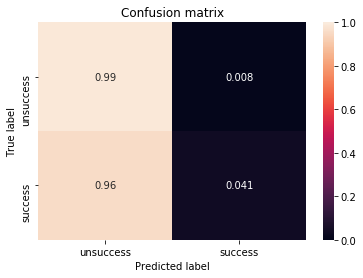

In [14]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_test = rf.score(X_test, y_test)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.987051206592113
Precision on train: 0.98221
Recall on train: 0.91898

Accuracy score on the test dataset: 0.89839
Precision on test: 0.76293
Recall on test: 0.42344


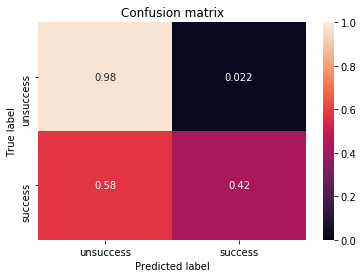

In [16]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [17]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. activity_intensity
2. num_Create
3. proj_span
4. normalized_proj_span
5. num_Push
6. first_quater_teamsize
7. final_teamsize
8. num_PullRequest
9. num_Watch
10. num_Fork


In [18]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_tr, y_tr)
ca = svc_linear.score(X_tr, y_tr)
print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_linear.score(X_test, y_test)
print('Linear SVC classification accuracy on test set: {:.5f}'.format(ca))

Linear SVC classification accuracy on training set: 0.86742
Linear SVC classification accuracy on test set: 0.85651


In [19]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test, y_test)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))




Radial Basis Function SVC classification accuracy on training set: 0.88184
Radial Basis Function SVC classification accuracy on test set: 0.86337


In [20]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))


Precision on train: 0.84028
Recall on train: 0.13430
Precision on test: 0.67857
Recall on test: 0.09091


In [21]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr, y_tr)
ca = svc_poly.score(X_tr, y_tr)
print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_poly.score(X_test, y_test)
print('Polynomial SVC classification accuracy on test set: {:.5f}'.format(ca))


Polynomial SVC classification accuracy on training set: 0.87463
Polynomial SVC classification accuracy on test set: 0.85479
